In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Codes - Datasets/Churn_Modelling.csv').iloc[:, 1:]

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
 12  Geography_Germany  10000 non-null  int64  
 13  Geography_Spain    10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [5]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True, dtype = int)

In [13]:
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


#### Here we donot want the surname and the customer Id since its not contributing in result that wether customer will stay or not

In [8]:
data.drop(columns = ['Surname', 'CustomerId'], inplace=True, axis = 1)

In [15]:
data.corr()['Exited']

CreditScore         -0.027094
Age                  0.285323
Tenure              -0.014001
Balance              0.118533
NumOfProducts       -0.047820
HasCrCard           -0.007138
IsActiveMember      -0.156128
EstimatedSalary      0.012097
Exited               1.000000
Gender_Male         -0.106512
Geography_Germany    0.173488
Geography_Spain     -0.052667
Name: Exited, dtype: float64

<Axes: >

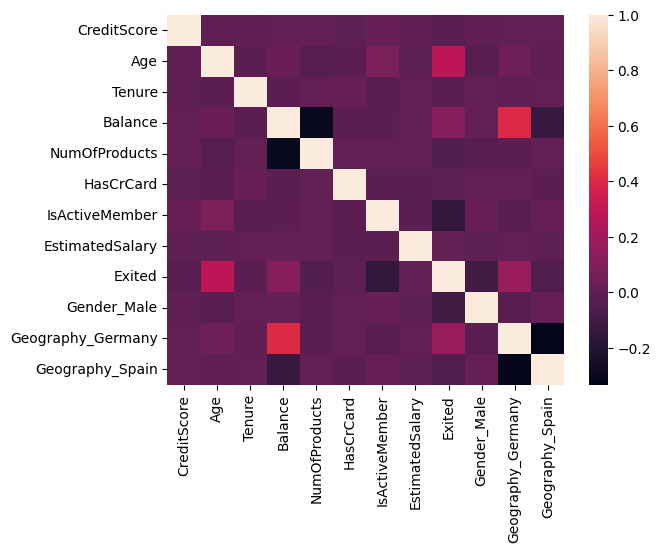

In [10]:
import seaborn as sns
sns.heatmap(data.corr())

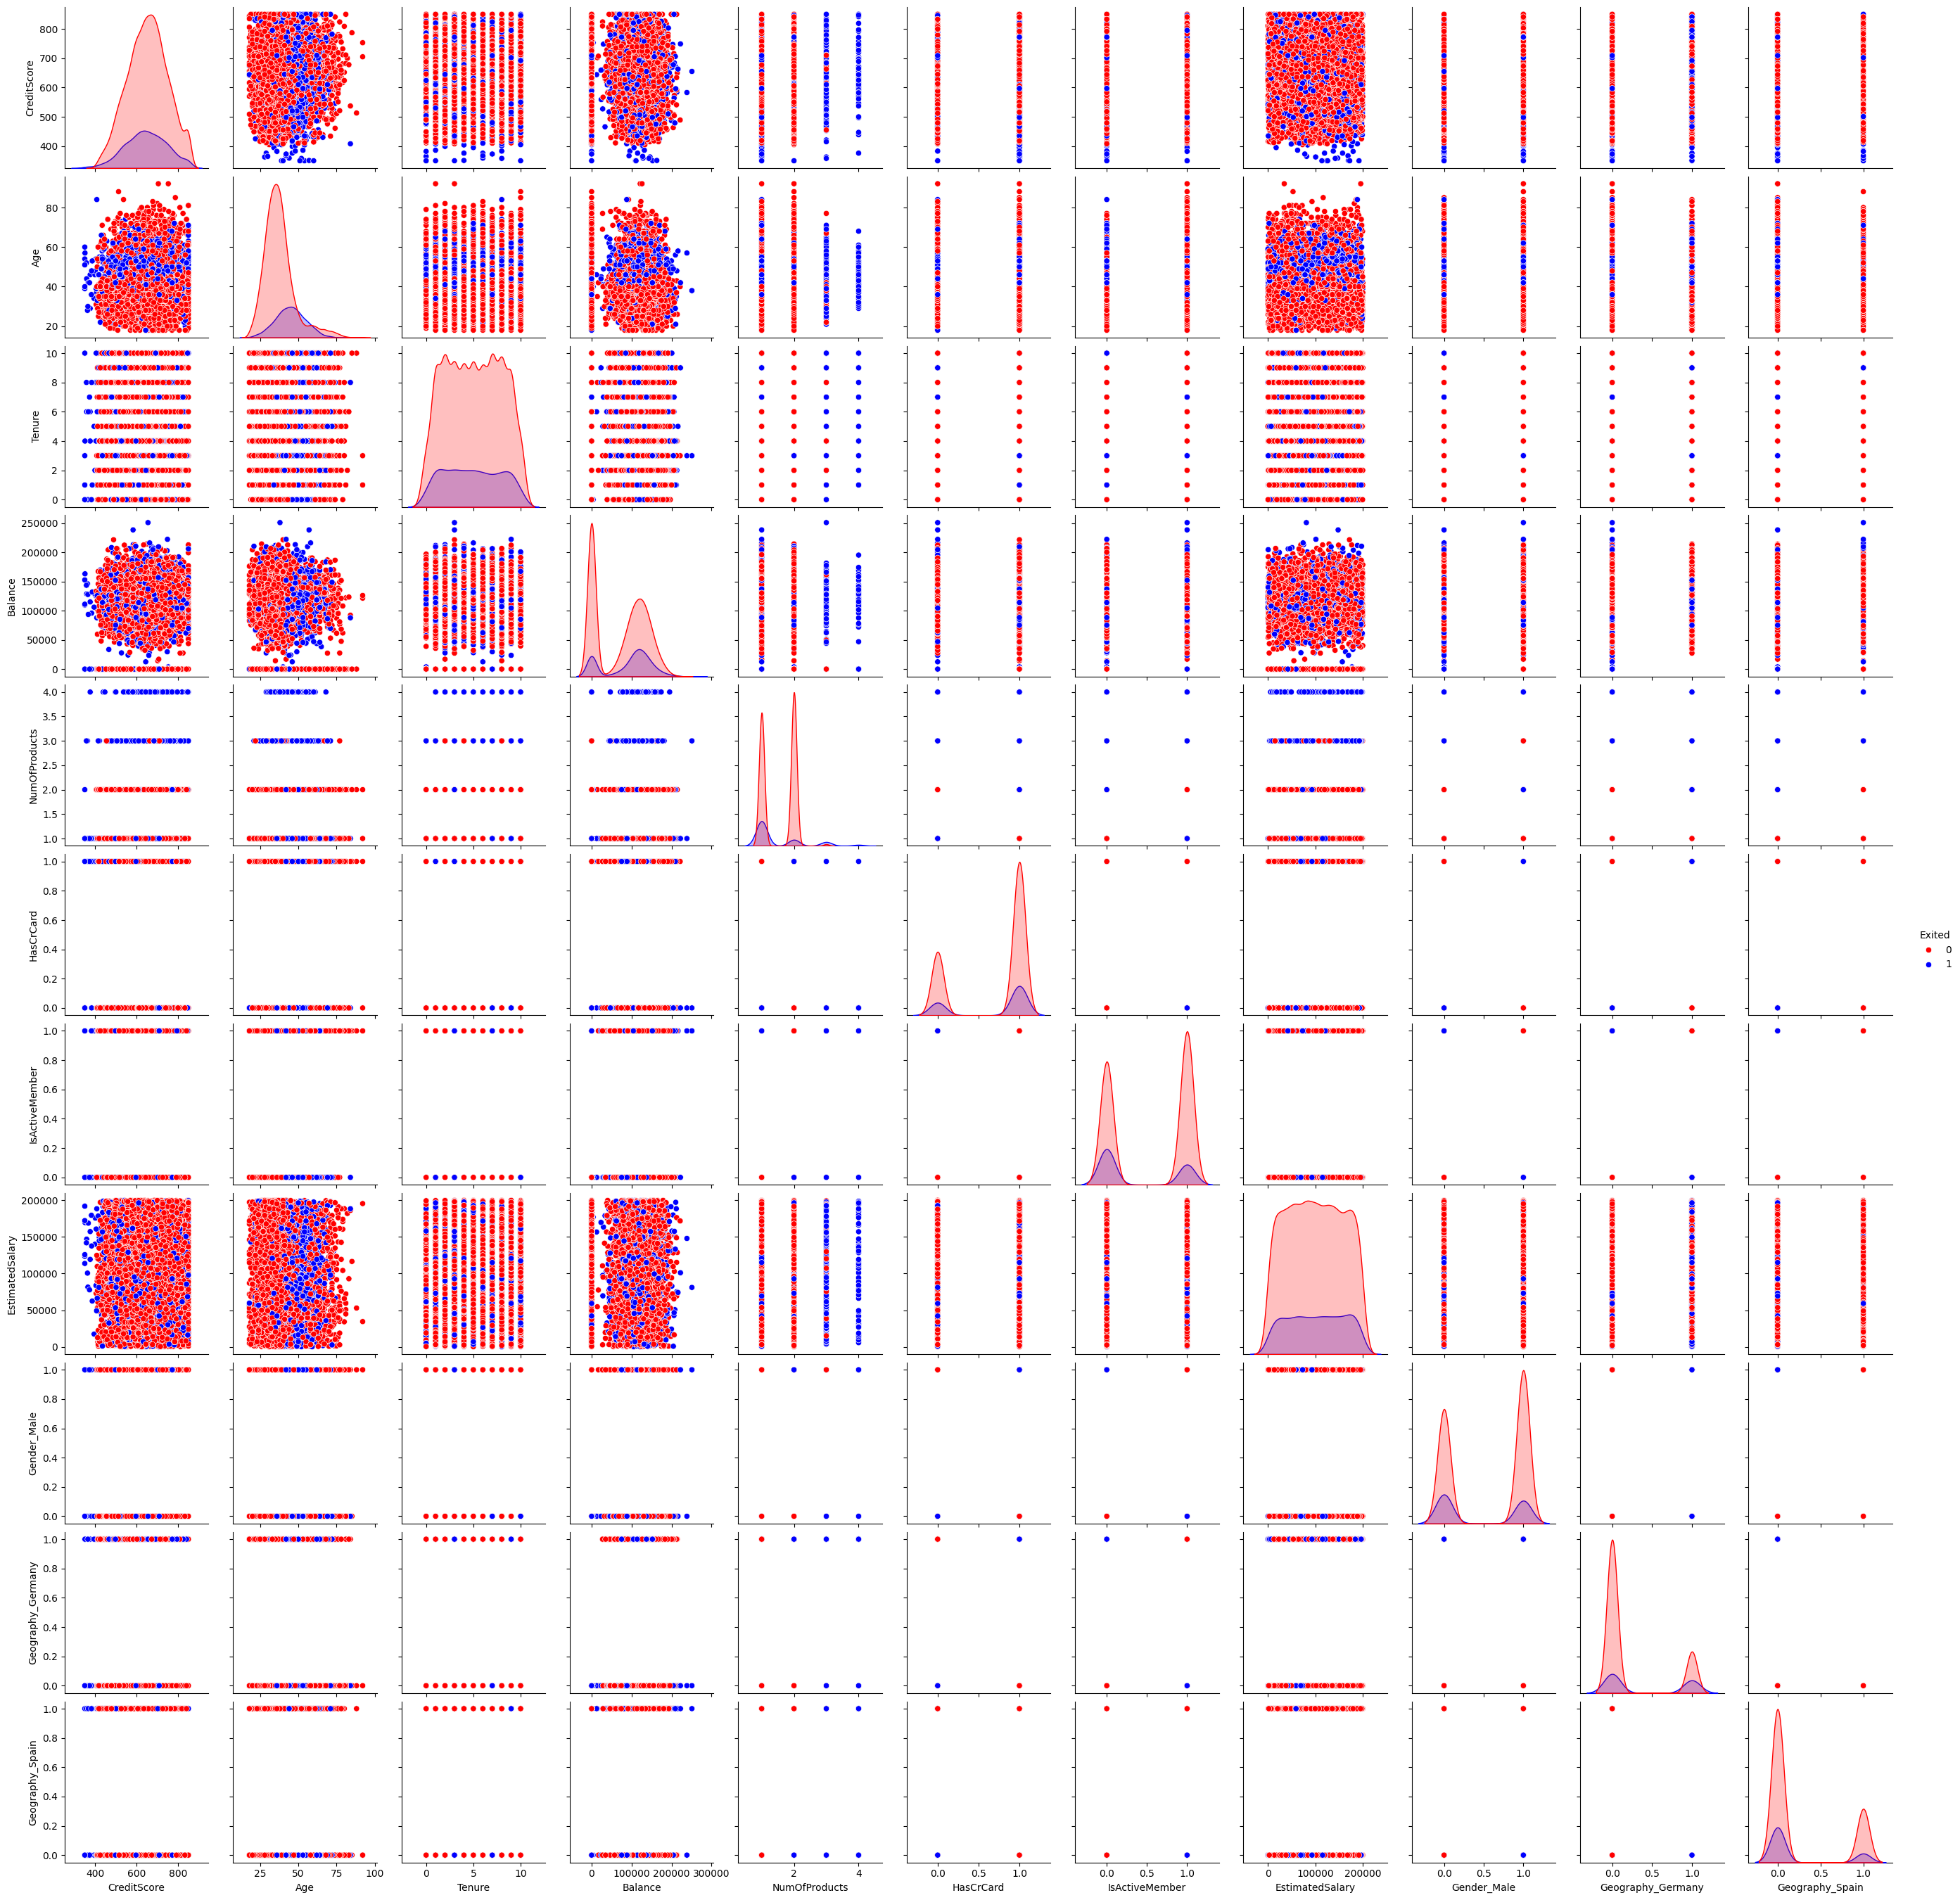

In [14]:
sns.pairplot(data, hue = 'Exited', hue_order= [0, 1], palette = ['red', 'blue'])

<Axes: xlabel='Geography_Spain', ylabel='Count'>

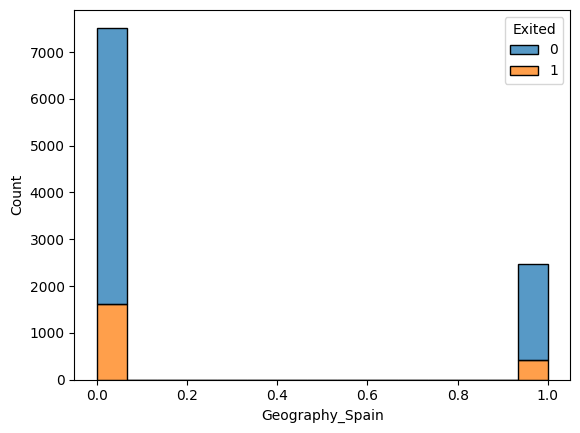

In [24]:
sns.histplot(data=data, x='Geography_Spain', hue='Exited', multiple='stack')

<Axes: xlabel='Geography_Germany', ylabel='Count'>

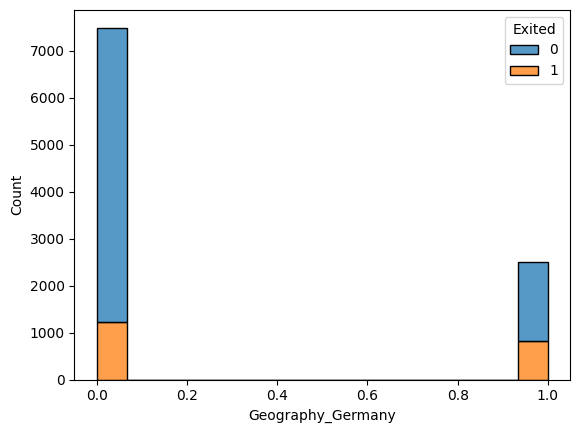

In [25]:
sns.histplot(data=data, x='Geography_Germany', hue='Exited', multiple='stack')